## Data Analysis of Amaraja share 
***Specifically we are going to visualize the variation in open and close price of Amaraja share in this notebook***

### Importing Necessary Libraries
- ***Findspark to get into Spark***
- ***kafka to get the data in kafkaCosumer***
- ***Matplotlib to Visualize the Data***
- ***json to deal with the data*** **Because we are getting the data in json format**
- ***Threading because Threads provide a way to improve application performance through parallelism***
- ***Warnings so that we can ignore the warnings that are not that much important***

In [1]:
import findspark
findspark.init()
from kafka import KafkaConsumer
import matplotlib.pyplot as plt
import json
import threading
import warnings
import seaborn as sns 
import numpy as np
warnings.filterwarnings('ignore')

### Starting Consumer 
- ***Consumer is used to get the data***
- ***Topic Name is Amaraja1***
- ***Port Number 9092***

In [2]:
consumer = KafkaConsumer('amaraja1',
                         group_id='amaraja1',
                         bootstrap_servers=['localhost:9092'],
                        )

In [3]:
x, y={}, {}

### Creating Plot function
***This function is used to continuously get the in the form of key-value pair and storing it into dictionaries X and Y***

In [4]:
def plot():
    global x
    for message in consumer:
        x[json.loads((message.value).decode("utf-8"))["date"]] = float(json.loads((message.value).decode("utf-8"))["open"])
        y[json.loads((message.value).decode("utf-8"))["date"]] = float(json.loads((message.value).decode("utf-8"))["close"])

### Starting Thread

In [5]:
plot_thread = threading.Thread(target=plot)
plot_thread.start()

### Let's Visualize the Data in Real Time 
- ***Importing Searborn library (used for Data Visualization)***
- ***Set figure Size (12,6)***
- ***Sorted Dictionary x and y by the date***
- ***Two line Plot we have used one for Open Price and One for Close price of the Day***
- ***One line plot to understand the flow of the data***
- ***Set XLabel***
- ***Set YLabel***
- ***Set The Title for the plot***
- ***Set XTicks and rotate those by 90 Degree and Keeping fontSize as 10***
- ***setting Ylim so that we can visualize lines in better manner***
- ***Setting legend so that we can understand which line represent which data***
- ***plt.show() is used to show the Plot***

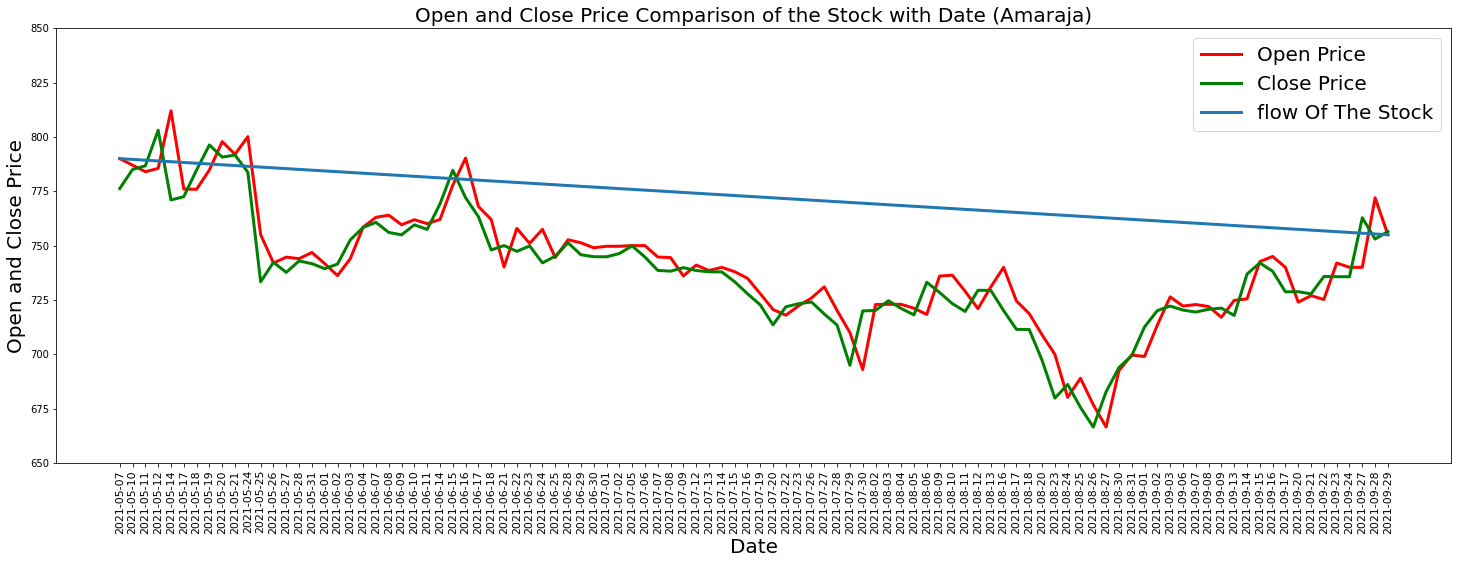

In [118]:
try:
    import seaborn as sns
    import numpy as np 
    fig = plt.figure(figsize = (25, 8))
    x = dict(sorted(x.items(), key=lambda item: item[0], reverse=False))
    y = dict(sorted(y.items(), key=lambda item: item[0], reverse=False))

    array=np.linspace(x[list(x.keys())[0]], x[list(x.keys())[-1]],len(x.keys()))

    sns.lineplot([*y.keys()], [*x.values()], color='red', linewidth=3,label='Open Price')
    sns.lineplot([*y.keys()], [*y.values()], color='green',linewidth=3, label= 'Close Price')
    sns.lineplot([*y.keys()], array, linewidth=3,label='flow Of The Stock')

    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Open and Close Price",fontsize=20)
    plt.title("Open and Close Price Comparison of the Stock with Date (Amaraja)", fontsize=20)
    plt.xticks(rotation=90, fontsize=11)
    plt.ylim((650,850))
    plt.legend(loc='upper right', fontsize=20, frameon=True)
    plt.show()
except:
    print('something wrong please Try Again! ')